# Mall Customers Clustering
#### Import libary yang dibutuhkan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Memasukkan Dataset

In [5]:
data = pd.read_csv('Mall_Customers.csv')


#### Menggunakan Algoritma Hierarchical

##### Membuat Dendrogram untuk mendapatkan jumlah cluster

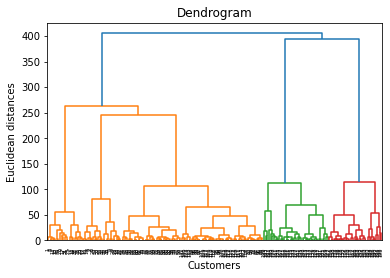

In [7]:
X = data.iloc[:, [3,4]].values
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title ('Dendrogram')
plt.xlabel ('Customers')
plt.ylabel ('Euclidean distances')
plt.show()

##### Menyesuaikan Clustering pada dataset menggunakan Algoritma Hierarchical 

In [8]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc=hc.fit_predict(X)

#### Membuat visualisasi hasil clustering menggunakan Hierarchical

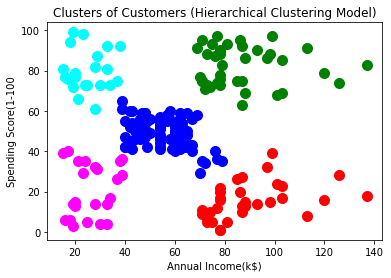

In [9]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

#### Menggunakan Algoritma DBSCAN
##### Mempersiapkan data untuk dimasukkan kedalam algoritma DBSCAN dengan menggunakan library sklearn

In [27]:
x=data.iloc[:,[2,3]].values
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(x)
label=model.labels_

#####  Melakukan data processing untuk mengetahui jumlah cluster

In [28]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 14


##### Melakukan visualisasi data dengan menggunakan plot

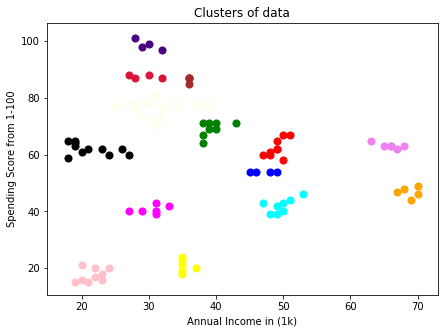

In [30]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.scatter(x[y_means == 9, 0], x[y_means == 9, 1], s = 50, c = 'green')
plt.scatter(x[y_means == 10, 0], x[y_means == 10, 1], s = 50, c = 'ivory')
plt.scatter(x[y_means == 11, 0], x[y_means == 11, 1], s = 50, c = 'brown')
plt.scatter(x[y_means == 12, 0], x[y_means == 12, 1], s = 50, c = 'crimson')
plt.scatter(x[y_means == 13, 0], x[y_means == 13, 1], s = 50, c = 'indigo')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()